# Fantasy Tactics Simulator

The goal of this game is to do a Dungeons & Dragons-like battle simulation, and then train a reinforcement learning AI on it.

The idea is to do DQN (deep Q network) learning. The Q function requires a state space input, and an action space input. 

The state space for an actor should include the battle map (allies, enemies, obstructions), the actor's own combat stats (hp, ac, damage, remaining movement, ), and (maybe?) the combat stats for allies and enemies. 

The action space will be 8-directional unit movment, and an attack action for the 10(?) closest units. 

The scoring function for an actor will be:
- +20 if actor survives till end
- +10 for each enemy killed
- +1 for each damage dealt to enemies
- -0.01 for each unit distance from closest enemy. 
- -1 for illegal actions


In [56]:
import numpy as np
from matplotlib import pyplot as plt

class Game():
    def __init__(self, h, w):
        # Game board is self, ally, enemy, obstacle
        self.ul = UnitList()
        self.game_board = GameBoard(h, w)
        self.h = h
        self.w = w
        
    def populate_board(self, n_1, n_2, obstacles):
        unit_pos = np.random.choice(np.arange(self.h * self.w), n_1 + n_2 + obstacles, False)
        self.team_1_pos = unit_pos[:n_1]
        self.team_2_pos = unit_pos[n_1:(n_1 + n_2)]
        self.obstacles = unit_pos[(n_1 + n_2):]
        
        for ele in self.team_1_pos:
            self.add_unit(Warrior(1), np.unravel_index(ele, (self.h,self.w)))
        for ele in self.team_2_pos:
            self.add_unit(Warrior(1), np.unravel_index(ele, (self.h,self.w)))
#         for ele in self.obstacles:
#             self.add_unit(Warrior(), np.unravel_index(ele, (h,w)) = 1
        
    def add_unit(self, unit, coords):
        unit_id = np.random.randint(2**16)
        self.ul.add_unit(unit_id, unit, coords)
        self.game_board.add_unit(unit_id, coords)
        return unit_id
    
    def move_unit(self, unit_id, new_coords):
        coords = self.ul.get_coords(unit_id)
        self.game_map.move_unit(coords, new_coords)
        self.ul.move_unit(unit_id, new_coords)
    
    def show_map(self):
        plt.imshow(self.game_board.game_board)


class UnitList():
    def __init__(self):
        self.unit_list = {}

    def add_unit(self, unit_id, unit, coords):
        self.unit_list[unit_id] = {'unit': unit, 'coords': coords}
    
    def move_unit(self, unit_id, new_coords):
        self.unit_list[unit_id]['coords'] = new_coords
        self.ul.move_unit()
        
    def get_coords(self, unit_id):
        return(self.unit_list[unit_id]['coords'])
    
        
class GameBoard():
    def __init__(self, h, w):
        self.game_board = np.zeros(shape = [h * w])
        self.game_board = self.game_board.reshape(h, w)

    def move_unit(self, coords, new_coords):
        unit_id = self.game_board[coords]
        self.game_board[coords] = 0
        self.game_board[new_coords] = unit_id

    def add_unit(self, unit_id, coords):
        self.game_board[coords] = unit_id
        
    def remove_unit(self, coords):
        self.game_board[coords] = 0


        
class Warrior():
    def __init__(self, level):
        self.strength, self.dexterity, self.constitution, \
        self.intelligence, self.wisdom, self.charisma = roll_stats([5, 4, 4, 3, 3, 3])

        self.attack = level + self.strength // 2 - 5
        self.damage = 3 + self.strength // 2 - 5
        self.defense = 19
        self.hp = np.sum([np.max([np.random.randint(1, 11) + self.constitution // 2 - 5, 1]) for l in range(level)])
        self.initiative = np.random.random()*20 + self.dexterity // 2 - 5
        position = [0,0]
        
def roll_stats(rolls = [3,3,3,3,3,3]):
    stats = [np.sum(np.sort([np.random.randint(6) for dice in range(rolls[stat])])[-3:]) + 3 for stat in range(6)]
    return(stats)
    

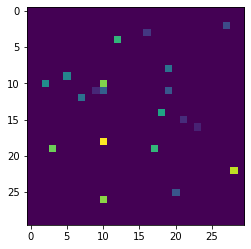

In [58]:
game = Game(30, 30)
game.populate_board(10, 10, 50)
game.show_map()

In [55]:
game.game_board.game_board

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00,

In [30]:
game.game_board

array([[    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.],
       [    0., 35041.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0